In [1]:
# Importing the dependencies
import math
import pandas_datareader as web
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Getting the Stock Quote
df = yf.download('AAPL', start = '2012-01-01', end = '2024-04-15')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433825,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500646,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639427,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771557,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751299,394024400
...,...,...,...,...,...,...
2024-04-08,169.029999,169.199997,168.240005,168.449997,168.449997,37425500
2024-04-09,168.699997,170.080002,168.350006,169.669998,169.669998,42451200
2024-04-10,168.800003,169.089996,167.110001,167.779999,167.779999,49709300


In [3]:
# Getting the number of rows and columns in the dataset
df.shape

(3089, 6)

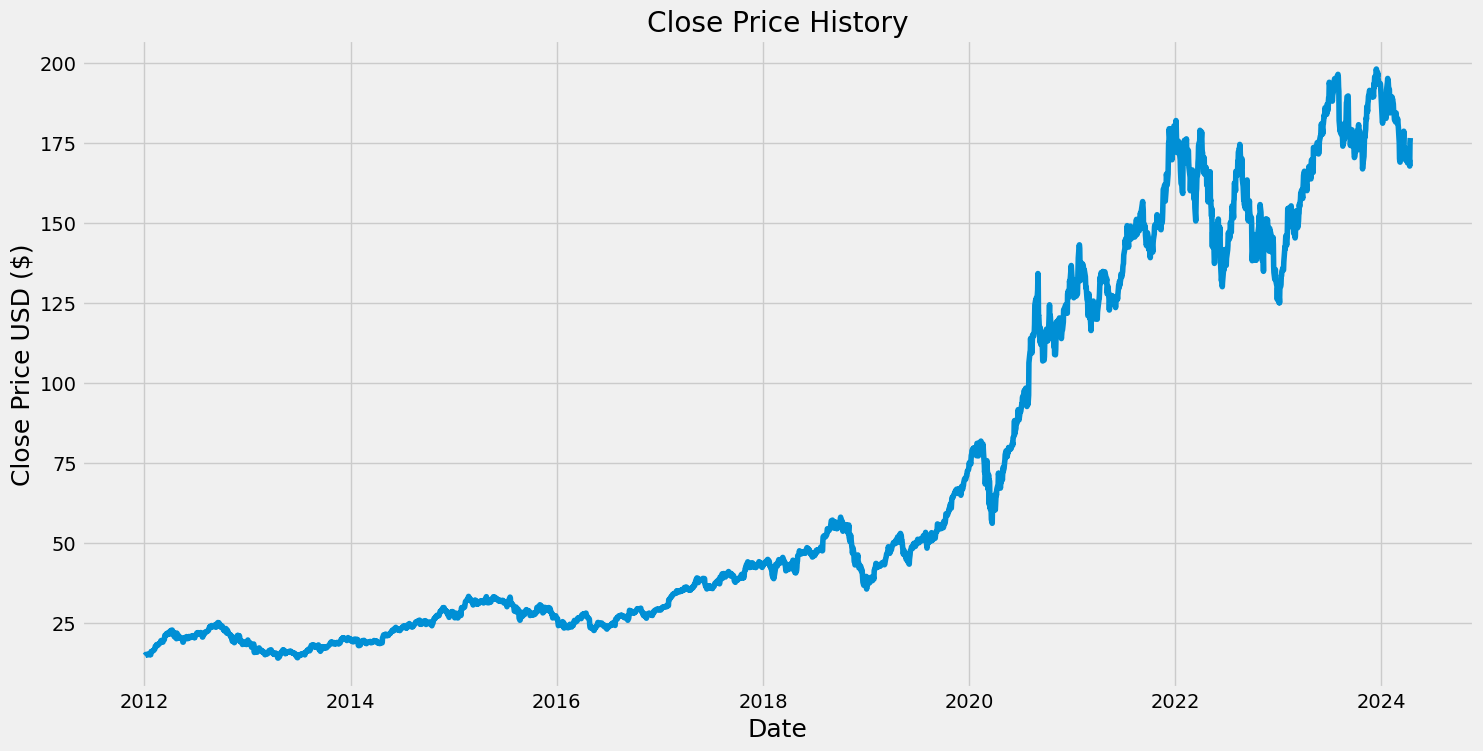

In [4]:
# Visualizing the closing price history
plt.figure(figsize = (16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [5]:
# Creating a new Dataframe with only 'Close' column
data = df.filter(['Close'])

# Converting the dataframe to numpy array
dataset = data.values

# Getting the number of row to train the model
training_data_len = math.ceil(len(dataset) * 0.8)

In [6]:
training_data_len

2472

In [7]:
# Scale the data
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)

In [8]:
scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.83530848],
       [0.87473016],
       [0.88292949]])

In [9]:
# Creating the training dataset and the scaled training dataset
train_data = scaled_data[0: training_data_len, :]

In [10]:
# Spliting the data into X_train and Y_train dataset
X_train = []
Y_train = []
for i in range(70, len(train_data)):
    X_train.append(train_data[i - 70: i, 0])
    Y_train.append(train_data[i, 0])
    if i <= 70:
        print(X_train)
        print(Y_train)
        print()

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914,
       0.04253425, 0.04053485, 0.044235  , 0.04630809, 0.04533651,
       0.04715362, 0.04764813, 0.04613744, 0.04570304, 0.04503786])]
[0.04163636028261808]



In [11]:
# Converting the X_train and Y_train to numpy arrays
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [12]:
# Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(2402, 70, 1)

In [13]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(60, return_sequences = False))
model.add(Dense(30))
model.add(Dense(1))

C:\Users\mukul\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# Compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
try:
    # Training the model
    model.fit(X_train, Y_train, batch_size=1, epochs=1)
except Exception as e:
    print("Error occurred during training:")
    print(e)

2402/2402 ━━━━━━━━━━━━━━━━━━━━ 78s 31ms/step - loss: 0.0039


In [16]:
# Creating the testing dataset and creating a new array containing scaled values
test_data = scaled_data[training_data_len - 70: , :]
X_test = []
Y_test = dataset[training_data_len: , :]
for i in range(70, len(test_data)):
    X_test.append(test_data[i - 70: i, 0])

In [17]:
# Convert the data to a numpy array
X_test = np.array(X_test)

In [18]:
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [19]:
# Getting the models predicted price value
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [20]:
# Getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - Y_test) ** 2)
rmse

1.190137359272912

C:\Users\mukul\AppData\Local\Temp\ipykernel_3872\2757793565.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


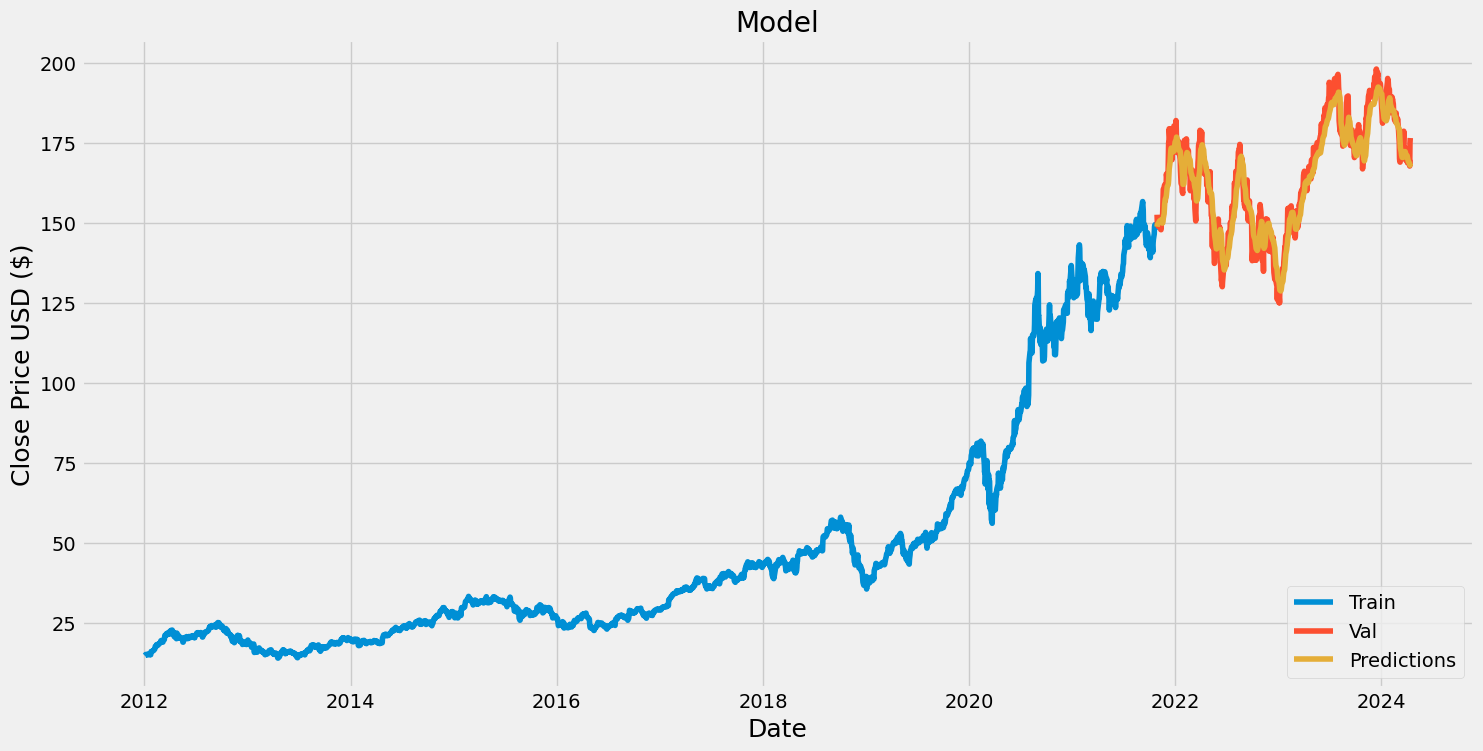

In [21]:
# Plotting the data
train = data[ :training_data_len]
valid = data[training_data_len: ]
valid['Predictions'] = predictions

# Visualizing the data
plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [22]:
# Showing the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-10-28,152.570007,148.805176
2021-10-29,149.800003,149.413925
2021-11-01,148.960007,149.796448
2021-11-02,150.020004,149.945145
2021-11-03,151.490005,150.062790
...,...,...
2024-04-08,168.449997,168.886154
2024-04-09,169.669998,168.540390
2024-04-10,167.779999,168.353516


In [23]:
# Get the quote
apple_quote = yf.download('AAPL', start = '2012-01-01', end = '2024-04-15')

[*********************100%%**********************]  1 of 1 completed


In [24]:
# Creating new Dataframe
new_df = apple_quote.filter(['Close'])

In [26]:
# Getting the last 60 day Closing price values and converting the dataframe to an array
last_60_days = new_df[-60: ].values

In [28]:
# Scale the data to be valued between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

In [29]:
# Creating an empty list
x_test = []

# Appending the past 60 days
x_test.append(last_60_days_scaled)

# Converting the x_test dataset to numpy array
x_test = np.array(x_test)

# Reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [31]:
# Getting the predicted scaled price
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[169.43214]], dtype=float32)

In [32]:
apple_quote2 = yf.download('AAPL', start = '2012-01-01', end = '2024-04-15')
apple_quote2['Close']

[*********************100%%**********************]  1 of 1 completed


Date
2012-01-03     14.686786
2012-01-04     14.765714
2012-01-05     14.929643
2012-01-06     15.085714
2012-01-09     15.061786
                 ...    
2024-04-08    168.449997
2024-04-09    169.669998
2024-04-10    167.779999
2024-04-11    175.039993
2024-04-12    176.550003
Name: Close, Length: 3089, dtype: float64